<a href="https://colab.research.google.com/github/waibazen/analyzing_data_analyst_jobpost_glassdoor/blob/model_analysis/model_analysis_gd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df=pd.read_csv('/content/eda_gd.csv')

In [5]:
df=df.drop('Unnamed: 0',1)


In [6]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'age',
       'python', 'R', 'Spark', 'AWS', 'Excel', 'SQL', 'machine_learning', 'AI',
       'Seniority', 'Title', 'desc_len', 'num_comp', 'job_state'],
      dtype='object')

In [7]:
df_model = df[[ 'avg_salary', 
             'Size',
       'Type of ownership', 'Industry', 'Sector',
      
       'Seniority', 'Title', 'desc_len', 'num_comp', 'job_state']]


In [8]:
# get dummy data 
df_dum = pd.get_dummies(df_model)
df_dum.sample(5)


,avg_salary,desc_len,num_comp,Size_-1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Contract,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_Private Practice / Firm,Type of ownership_School / School District,Type of ownership_Self-employed,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Automotive Parts & Accessories Stores,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Building & Personnel Services,"Industry_Cable, Internet & Telephone Providers",Industry_Chemical Manufacturing,Industry_Colleges & Universities,...,job_state_ CO,job_state_ CT,job_state_ DC,job_state_ DE,job_state_ FL,job_state_ GA,job_state_ IA,job_state_ ID,job_state_ IL,job_state_ IN,job_state_ KS,job_state_ KY,job_state_ LA,job_state_ MA,job_state_ MD,job_state_ MI,job_state_ MN,job_state_ MO,job_state_ MS,job_state_ NC,job_state_ NE,job_state_ NH,job_state_ NJ,job_state_ NM,job_state_ NY,job_state_ OH,job_state_ OK,job_state_ OR,job_state_ PA,job_state_ RI,job_state_ SC,job_state_ TN,job_state_ TX,job_state_ UT,job_state_ VA,job_state_ WA,job_state_ WI,job_state_ WY,job_state_Remote,job_state_UT
181,50.0,957,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
339,93.0,4948,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
13,50.0,3333,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
227,78.0,2310,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
473,104.5,3569,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# train test split 
from sklearn.model_selection import train_test_split

X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)


In [10]:
# multiple linear regression 
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     4.863
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           1.82e-45
Time:                        22:42:09   Log-Likelihood:                -3590.6
No. Observations:                 800   AIC:                             7483.
Df Residuals:                     649   BIC:                             8191.
Df Model:                         150                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                64.7628      4.165     15.549      0.000      56.584      72.941
desc_len                                             -0.0006      0.001     -1.091      0.276      -0.002       0.001
num_comp                                              0.4816      0.860      0.560      0.576      -1.208       2.171
Size_-1                                              10.5043      4.896      2.145      0.032       0.890      20.118
Size_1 to 50 employees                                7.4649      3.051      2.447      0.015       1.475      13.455
Size_10000+ employees                                 7.6345      3.388      2.253      0.025       0.981      14.288
Size_1001 to 5000 employees                           5.9696      2.491      2.397      0.017       1.078      10.861
Size_201 to 500 employees                             8.1845      2.802      2.921      0.004       2.683      13.686
Size_5001 to 10000 employees                          4.1759      4.505      0.927      0.354      -4.670      13.021
Size_501 to 1000 employees                           10.2368      3.224      3.175      0.002       3.906      16.567
Size_51 to 200 employees                              4.1331      2.683      1.541      0.124      -1.135       9.401
Size_Unknown                                          6.4593      8.836      0.731      0.465     -10.891      23.809
Type of ownership_-1                                 10.5043      4.896      2.145      0.032       0.890      20.118
Type of ownership_College / University                8.4872     16.393      0.518      0.605     -23.703      40.677
Type of ownership_Company - Private                   1.3653      3.917      0.349      0.728      -6.326       9.056
Type of ownership_Company - Public                    3.7354      4.392      0.850      0.395      -4.889      12.360
Type of ownership_Contract                          -12.6852     13.733     -0.924      0.356     -39.653      14.282
Type of ownership_Government                        -18.0583     17.382     -1.039      0.299     -52.190      16.074
Type of ownership_Hospital                            8.3175     11.317      0.735      0.463     -13.906      30.541
Type of ownership_Nonprofit Organization              9.5354      5.303      1.798      0.073      -0.879      19.949
Type of ownership_Other Organization                 23.8046     17.592      1.353      0.176     -10.739      58.349
Type of ownership_Private Practice / Firm             3.4124     12.663      0.269      0.788     -21.452      28.277
Type of ownership_School / School District           14.4509     22.808      0.634      0.527     -30.336      59.238
Type of ownersh

In [11]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error',cv=3))


-530535219.09503275

,alpha,error
33,0.34,-17.862173


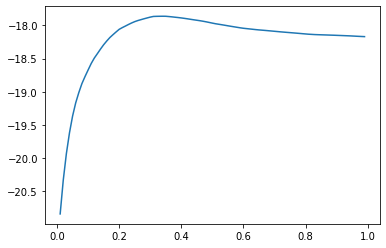

In [12]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [13]:
# lasso regression 
lm_l = Lasso(alpha=.34)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))


-17.862172790072744

In [14]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))


-19.856914931437014

In [17]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = { 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)



GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [19]:
gs.best_score_
#gs.best_estimator_


-19.54412130884998

In [25]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)



In [33]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_rf)
#mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

19.057453125000002